In [4]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

import warnings
warnings.filterwarnings('ignore')

In [5]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [6]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [84]:
content_image = load_image('/Users/mitssverma/Downloads/images-3.jpeg')
style_image = load_image('/Users/mitssverma/Downloads/Unknown-3.jpeg')

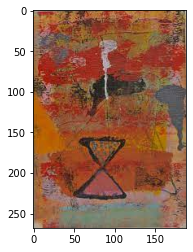

In [85]:
plt.imshow(np.squeeze(style_image))
plt.show()

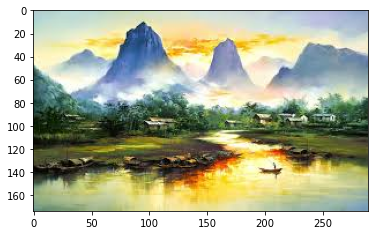

In [86]:
plt.imshow(np.squeeze(content_image))
plt.show()

In [87]:
stylized_image = model(tf.constant(content_image),tf.constant(style_image))[0]

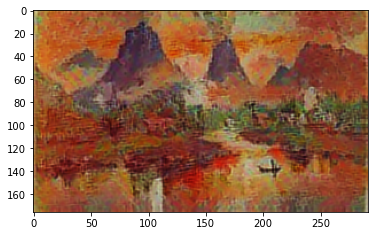

In [88]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [83]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True